In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
data = pd.read_csv('/content/Advertising.csv')

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


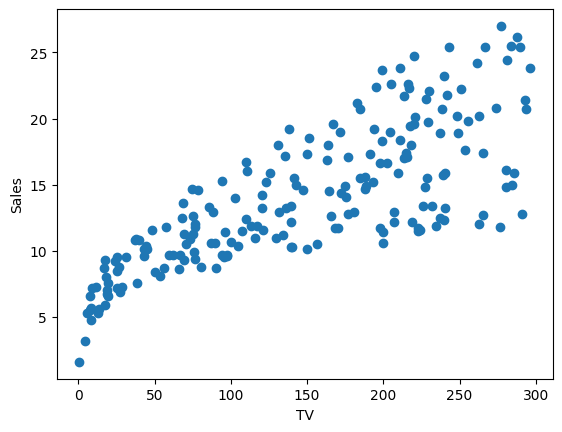

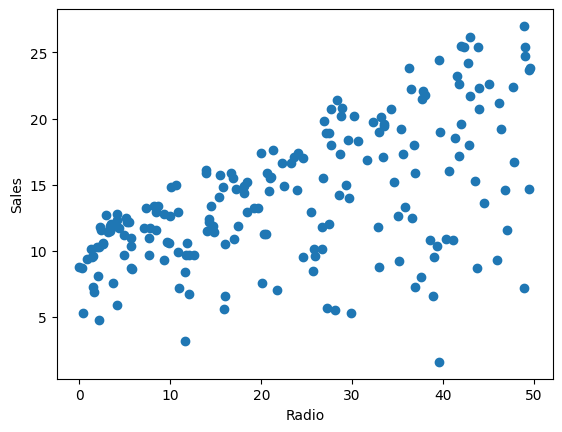

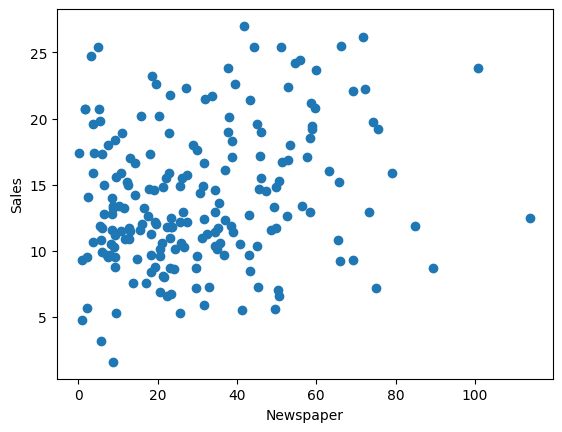

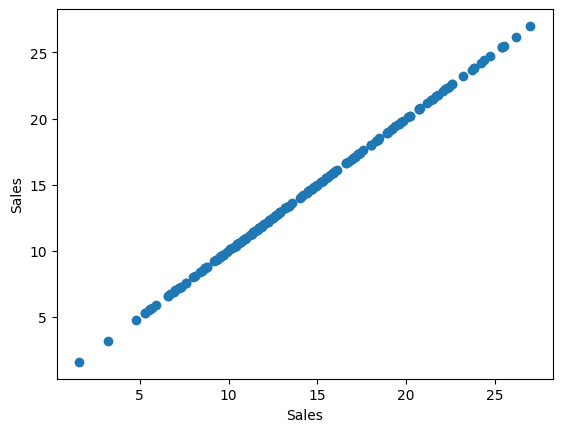

In [ ]:

for feature in data.columns[1:]:
    plt.scatter(data[feature], data['Sales'])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

In [ ]:
# prepare data

x = data.drop(['Sales', 'Unnamed: 0'], axis=1)
y = data['Sales']

In [ ]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [ ]:
# feature scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# split data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# train linear regression model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# make predictions

y_pred = model.predict(x_test)
x_pred = model.predict(x_train)

In [ ]:
# evaluate model
x_train_mse = mean_squared_error(y_train, x_pred)
y_pred_mse = mean_squared_error(y_test, y_pred)

x_train_r2 = r2_score(y_train, x_pred)
y_pred_r2 = r2_score(y_test, y_pred)

In [ ]:
print('Training MSE:', x_train_mse)
print('Testing MSE:', y_pred_mse)
print('Training R2:', x_train_r2)
print('Testing R2:', y_pred_r2)

Training MSE: 2.7051294230814142
Testing MSE: 3.1740973539761064
Training R2: 0.8957008271017817
Testing R2: 0.8994380241009119


In [ ]:
coef = model.coef_
print(coef)

[3.83060599 2.80191171 0.05998274]


In [ ]:
intercept = model.intercept_
print(intercept)

14.042004239811021
